<a href="https://colab.research.google.com/github/LeonardoCostaDeSa/Spotify-Song-Mood-Classifier/blob/main/Projeto_ML_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de músicas do Spotify

## **Sobre a Base de Dados**
Este projeto utiliza o Spotify Tracks Dataset, que contém informações detalhadas sobre faixas de áudio de mais de 125 gêneros musicais diferentes. Cada faixa no dataset possui diversos atributos de áudio que nos ajudam a entender características como energia, danceabilidade, valence, entre outras.

## **Objetivo do Projeto 🎯**

O objetivo deste projeto é criar **um modelo preditivo que classifique músicas em duas categorias: lentas e agitadas**. Para isso, utilizamos o Spotify Tracks Dataset, disponível no Kaggle. O dataset oferece um rico conjunto de características de áudio que foram exploradas e modeladas para atingir esse objetivo.

Você pode acessar mais detalhes sobre o dataset diretamente no Kaggle, através deste link:

https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

In [1]:
import pandas as pd

In [5]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('dataset.csv', on_bad_lines = 'warn')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
df.shape

(114000, 21)

##**Criando a variável target**🎯

De acordo com a regra de negócio, a coluna **valence** é uma métrica que varia de 0,0 a 1,0 e descreve a positividade musical transmitida por uma faixa. Músicas com alta valência tendem a soar mais positivas (como feliz, alegre, ou eufórica), enquanto faixas com baixa valência têm uma sonoridade mais negativa (como triste, deprimida ou irritada).

Para definir a coluna alvo do nosso modelo preditivo, utilizamos a coluna "valence" como o critério para classificar as músicas como agitadas ou lentas. **Assim, baseamos nossa classificação na análise dessa métrica de positividade** para separar as faixas em duas categorias distintas.

In [7]:
import matplotlib.pyplot as plt

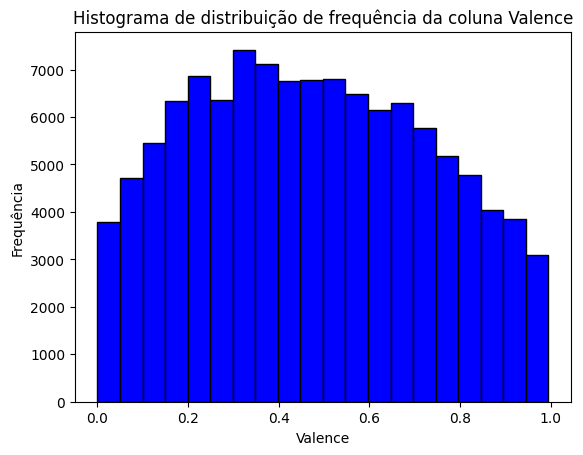

In [8]:
#Aqui iremos analisar a coluna "valence" para criar um target
df['valence'] = pd.to_numeric(df['valence'], errors='coerce')
plt.hist(df['valence'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Valence')
plt.ylabel('Frequência')
plt.title('Histograma de distribuição de frequência da coluna Valence')
plt.show()

In [9]:
df['valence'].describe()

,valence
count,114000.000000
mean,0.474068
std,0.259261
min,0.000000
25%,0.260000
50%,0.464000
75%,0.683000
max,0.995000


In [10]:
#vamos criar uma função para categorizar as músicas de acordo com a Valence
def categorizar_valence(row):
  if row['valence'] >= 0.5:
    return 'Agitada'
  else:
    return 'Lenta'

#Vamos também criar uma coluna com a 'target'
df['target'] = df.apply(categorizar_valence, axis=1)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Agitada
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Lenta
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Lenta
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Lenta
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Lenta


## **Feature Engineering**  🛠️

Agora, vamos criar um novo dataframe que contenha **apenas as colunas essenciais para a classificação das músicas**. Dessa forma, poderemos focar nas informações que realmente importam para o nosso modelo preditivo, **otimizando o processo de análise e treinamento.**



In [11]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'target'],
      dtype='object')

In [12]:
df_musicas = df.drop(['Unnamed: 0', 'track_id'], axis=1)
df_musicas.head()



,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Agitada
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Lenta
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Lenta
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Lenta
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Lenta


### **Tratando os dados categóricos** 🧰

Para tratar os dados categóricos presentes no nosso dataset, utilizamos o **LabelEncoder**. Essa classe transforma os rótulos de classes em números inteiros, tornando-os adequados para algoritmos de aprendizado supervisionado que exigem entradas numéricas. **Ao aplicar essa técnica, conseguimos traduzir colunas categóricas em um formato que nossos modelos de machine learning podem processar corretamente**.



In [13]:
def label_encoder_dataframe(df, columns_to_encode):
  from sklearn.preprocessing import LabelEncoder
  label_encoder = LabelEncoder()

  for column in columns_to_encode:
    if column in df.columns:
      df[column] = label_encoder.fit_transform(df[column])
    else:
      print('A lista possui colunas que não existem no DataFrame')

  return df

colunas_a_codificar = ['artists', 'album_name', 'track_name', 'explicit', 'track_genre', 'target']
label_encoder_dataframe(df_musicas, colunas_a_codificar)
df_musicas.head(25)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,10357,8100,11741,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0,0
1,3287,14796,22528,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0,1
2,12397,39162,60774,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0,1
3,14839,8580,9580,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0,1
4,5255,16899,25689,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0,1
5,28649,9306,13744,58,214240,0,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,0,0
6,204,18765,51044,74,229400,0,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,0,1
7,12981,41972,27754,80,242946,0,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,0,0
8,12982,41972,35274,74,189613,0,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,0,0
9,23455,17349,26348,56,205594,0,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,0,1


### **Analisando as variáveis que vão compor nosso modelo** 🔎

Para garantir que as variáveis mais relevantes fossem utilizadas no nosso modelo preditivo, foi realizada uma **análise de correlação** entre as variáveis do dataset. Isso nos ajuda a **identificar relações e padrões importantes entre as características das músicas.**

Utilizamos um mapa de calor (heatmap), que visualiza a correlação entre as variáveis numéricas. A correlação é uma métrica importante que indica como duas variáveis se relacionam entre si. Valores de correlação próximos de 1 ou -1 indicam uma forte relação, enquanto valores próximos de 0 indicam pouca ou nenhuma correlação.

<Axes: >

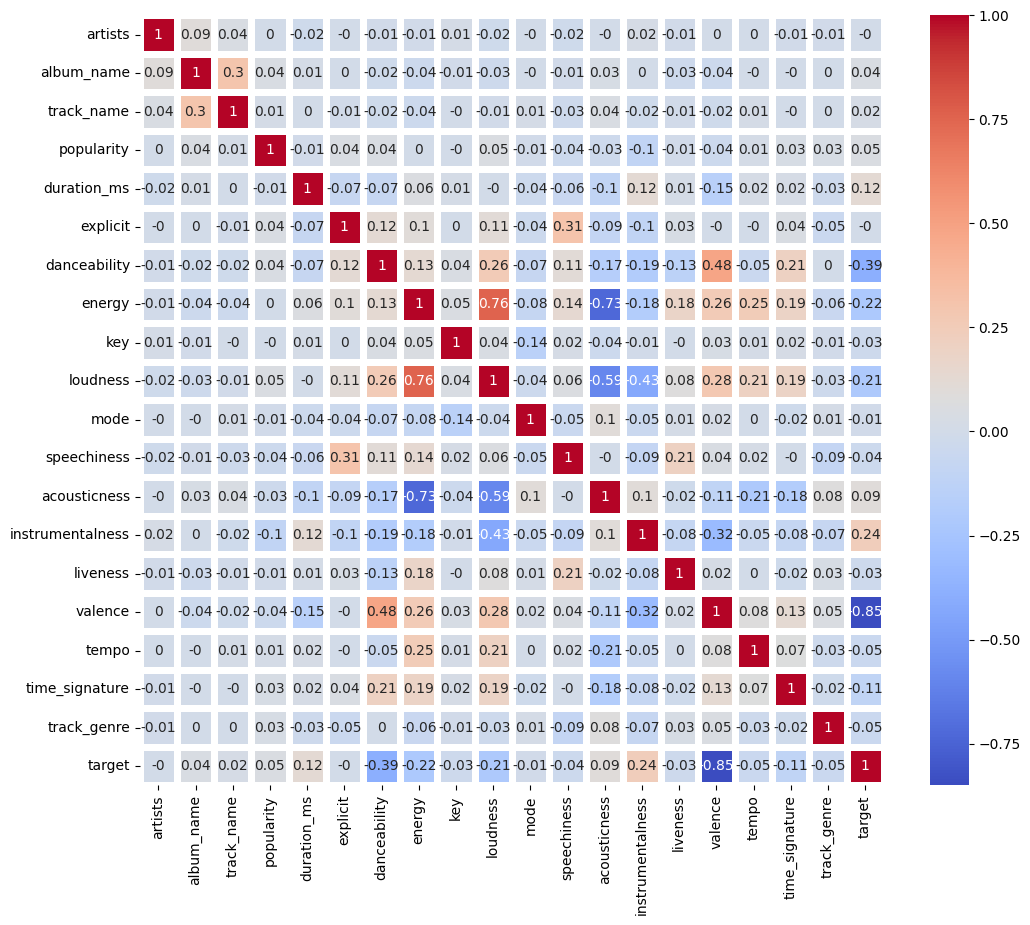

In [14]:
import seaborn as sea_born

correlation_matrix = df_musicas.corr().round(2)

fig, ax = plt.subplots(figsize=(12,10))
sea_born.heatmap(data=correlation_matrix, annot=True, linewidths=5, ax=ax, cmap="coolwarm")

### **Entendendo o equilíbrio da target**🎯

Avaliar o equilíbrio da nossa variável alvo é crucial para o sucesso do modelo preditivo. Neste caso, a variável target, que classifica as músicas como 'Lenta' (1) e 'Agitada' (0), mostra uma distribuição quase equilibrada entre as duas categorias. Conforme os dados:

*    **Lentas: 54.25%**
*    **Agitada: 45.75%**

Isso **indica uma distribuição relativamente balanceada**, o que é benéfico para o treinamento do modelo, pois evita o viés em direção a uma classe específica.

In [15]:
#Aqui precisamos entender qual a distribuição da target em 0 e 1 (FOI CONVERTIDA NO ENCODER)
round(df_musicas['target'].value_counts(normalize = True)*100, 2)

,proportion
target,
1,54.25
0,45.75


In [16]:
set(df['target'])

{'Agitada', 'Lenta'}

In [17]:
set(df_musicas['target'])

{0, 1}

## **Separando os dados em treino e teste** 🔄

Para garantir que nosso **modelo seja capaz de generalizar bem para novos dados**, é essencial separar nosso conjunto de dados em duas partes: treino e teste. Este processo é conhecido como método **hold out**.

Procedimento que vamos reaizar:

1.  **Seleção das Variáveis**: Definimos as variáveis preditoras X (que incluem características como 'popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'track_genre') e a variável alvo y (que representa se uma música é 'Agitada' ou 'Lenta').
2.  **Divisão dos Dados**: Utilizamos a função train_test_split do sklearn.model_selection para dividir o dataset. Especificamos 20% dos dados para o teste com a opção test_size=0.2.
3.  **Estratificação**: Para manter a proporção das classes alvo nas divisões de treino e teste, usamos a opção stratify=y, garantindo que ambas as categorias sejam representadas adequadamente.
4.  **Semente Aleatória**: Definimos a random_state=7 para garantir a reprodutibilidade do processo de divisão.

Essa separação é crítica para** treinar o modelo de maneira eficaz e avaliar sua performance em condições que simulam sua aplicação real**.



In [18]:
df_musicas.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'target'],
      dtype='object')

In [19]:
#separando os dados em treino e teste (método hold out)
from sklearn.model_selection import train_test_split

X = df_musicas[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'track_genre']]
y = df_musicas['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)

In [20]:
print(x_train.shape)
print(x_test.shape)


(91200, 9)
(22800, 9)


## **Normalizando os dados** 📏

A normalização é um passo crucial no pré-processamento de dados para modelos de machine learning, especialmente para aqueles **algoritmos que são sensíveis à escala dos dados**, como **KNN** ou modelos **baseados em gradientes**. Utilizamos a técnica **MinMaxScaler** para este fim, que ajusta todos os valores numéricos no intervalo de 0 a 1. Neste método, o valor mínimo de cada coluna é transformado em 0, e o valor máximo em 1.

**Por que Normalizar Após a Separação em Treino e Teste?** 🤔

É fundamental aplicar a normalização após a separação dos dados em conjuntos de treino e teste para evitar o **Data Leak**. Se a normalização fosse aplicada antes da separação, os parâmetros usados para escalar os dados seriam calculados com base em todo o conjunto, incluindo os dados de teste. Isso introduziria informações sobre o conjunto de teste no modelo durante o treinamento, **o que poderia resultar em uma avaliação superestimada do desempenho do modelo.** Ao normalizar os dados apenas após a separação, garantimos que o treinamento do modelo seja realizado de forma justa e que as métricas de desempenho reflictam uma capacidade genuína de generalização para novos dados.

In [21]:
from sklearn.preprocessing import MinMaxScaler

#pe preciso criar uma instância do MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

## **Criando uma função para executar modelos de machine learning** 🚀

Para otimizar nosso processo de desenvolvimento e avaliação dos modelos preditivos, **vamos criar uma função dedicada a essa tarefa**. Essa função será responsável por executar qualquer modelo de machine learning fornecido e calcular suas métricas de performance, garantindo uma avaliação consistente e eficiente.

**Objetivos da Função**:

**Executar o Modelo:** A função receberá como entrada o modelo de machine learning e os dados de treino e teste.
**Avaliar Performance:** Utilizará métricas de validação padrão para avaliar a eficácia do modelo. Essas métricas incluem precisão, recall, F1-score e a área sob a curva ROC (AUC), entre outras.
A criação dessa função permite uma abordagem modular e reutilizável para testar diferentes algoritmos e configurações, facilitando o processo de iteração e aprimoramento dos modelos.


In [22]:
def roda_modelo(modelo):

    from sklearn.metrics import roc_curve, roc_auc_score, classification_report

    # Treinando modelo com os dados de treino
    modelo.fit(x_train_escalonado, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(x_test_escalonado) # obter as probabilidades associadas às classes previstas para cada instância de dados
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(x_test_escalonado)
    print("\nClassification Report")
    print(classification_report(y_test, predicao))

    print("\nRoc Curve\n")
    # Fazer previsões de probabilidades
    y_pred_probs = modelo.predict_proba(x_test_escalonado)[:, 1]

    # Calcular a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

    # Calcular a AUC (área sob a curva ROC)
    auc = roc_auc_score(y_test, y_pred_probs)

    # Plotar a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})') # linewidth
    plt.plot([0, 1], [0, 1], color='gray',linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Converter probabilidades em classes preditas (0 ou 1)
    y_pred = (y_pred_probs > 0.5).astype(int)

## **Implementação dos algoritmos de Machine Learning** 🤖

### **Regressão logística**

O modelo adota uma função logística, **que é essencial para transformar as variáveis independentes em uma probabilidade que varia entre 0 e 1.** Essa função é especialmente útil em modelos de classificação binária, como o nosso, que precisa diferenciar entre músicas agitadas e lentas. Ao receber novas entradas de dados, o modelo utiliza essa função para **calcular a probabilidade de uma música ser classificada como agitada**. Esta abordagem fornece uma base quantitativa para a tomada de decisão, permitindo que o modelo faça previsões precisas sobre a categoria de cada faixa..

AUC 0.7891424824132753

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.69      0.69     10431
           1       0.74      0.74      0.74     12369

    accuracy                           0.72     22800
   macro avg       0.71      0.71      0.71     22800
weighted avg       0.72      0.72      0.72     22800


Roc Curve



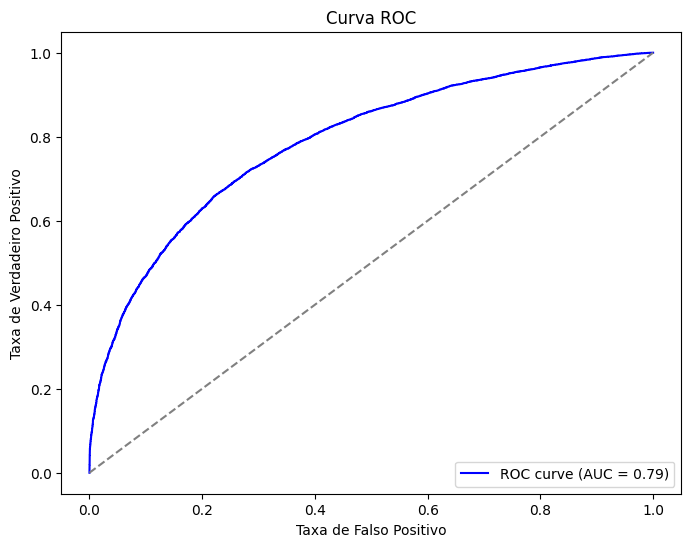

In [23]:
from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression()
roda_modelo(modelo_logistico)

### **KNN (K-Nearest Neighbors)**

O algoritmo **KNN** (K-Nearest Neighbors) é uma técnica de aprendizado supervisionado que não faz suposições sobre a forma dos dados. Ele opera sob um princípio simples: **para um novo ponto de dados, o KNN localiza os K vizinhos mais próximos dentro do conjunto de treinamento**. A predição da classe para o novo ponto é então determinada pela classe mais comum entre esses vizinhos.



AUC 0.8131926878995295

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.73      0.73     10431
           1       0.77      0.78      0.78     12369

    accuracy                           0.75     22800
   macro avg       0.75      0.75      0.75     22800
weighted avg       0.75      0.75      0.75     22800


Roc Curve



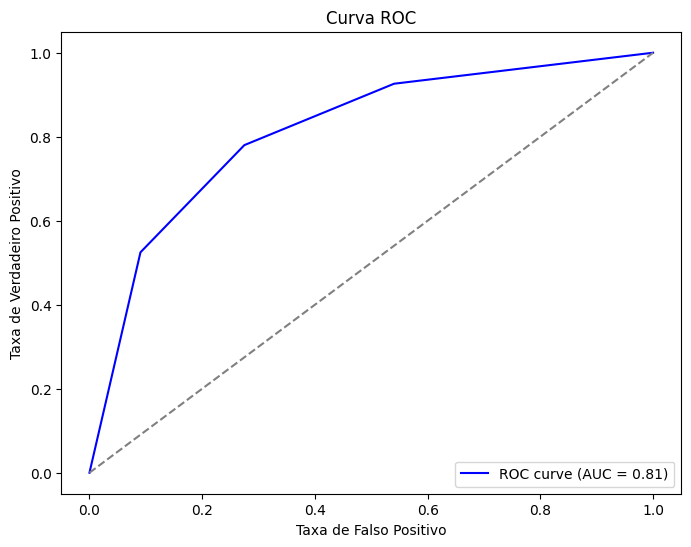

In [24]:
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors=3)
roda_modelo(modelo_knn)

### **Random Florest**
O Random Forest Classifier é uma técnica poderosa de **ensemble learning** que melhora a precisão das previsões combinando os resultados de múltiplos modelos. Esse método envolve a criação de uma "floresta" de árvores de decisão, cada uma treinada com um subconjunto aleatório dos dados — um processo conhecido como bootstrap.

A vantagem do Random Forest é sua **capacidade de reduzir o risco de overfitting**, comum em modelos de árvore de decisão única, tornando-o robusto contra variações nos dados. Ele também fornece estimativas sobre a importância das variáveis, o que pode ser útil para entender os fatores que mais influenciam as previsões.



AUC 0.8263180588710032

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.72      0.72     10431
           1       0.76      0.76      0.76     12369

    accuracy                           0.74     22800
   macro avg       0.74      0.74      0.74     22800
weighted avg       0.74      0.74      0.74     22800


Roc Curve



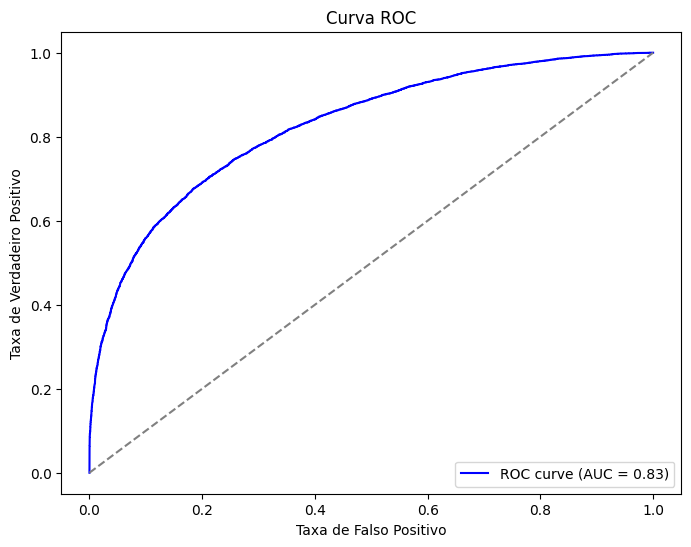

In [25]:
from sklearn.ensemble import RandomForestClassifier
modelo_random_forest = RandomForestClassifier(max_depth=7, n_estimators= 100)
roda_modelo(modelo_random_forest)

### **Testando novos parâmetros para o Random Florest com Grid Search**

O Grid Search é uma técnica fundamental para** otimizar os modelos de machine learning**, como o Random Forest, permitindo que encontremos a configuração ideal de hiperparâmetros que maximiza o desempenho do modelo. Esse método de busca exaustiva testa todas as combinações possíveis de hiperparâmetros dentro de um espaço definido, o que garante uma exploração completa das opções.



In [26]:
from sklearn.model_selection import GridSearchCV

# Defina os parâmetros a serem testados
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15]
}

# GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=1)

# Ajuste o modelo ao conjunto de dados
grid_search.fit(x_train_escalonado, y_train)

rf_params = grid_search.best_params_
print("Melhores hiperparâmetros:", rf_params)

'\nfrom sklearn.model_selection import GridSearchCV\n\n# Defina os parâmetros a serem testados\nparam_grid = {\n    "n_estimators": [100, 200, 300],\n    "max_depth": [5, 10, 15]\n}\n\n# GridSearchCV\ngrid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring=\'f1\', n_jobs=1)\n\n# Ajuste o modelo ao conjunto de dados\ngrid_search.fit(x_train_escalonado, y_train)\n\nrf_params = grid_search.best_params_\nprint("Melhores hiperparâmetros:", rf_params)\n'

Melhores hiperparâmetros: {'max_depth': 15, 'n_estimators': 200}

AUC 0.9024629308712976

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.81      0.80     10431
           1       0.84      0.83      0.83     12369

    accuracy                           0.82     22800
   macro avg       0.82      0.82      0.82     22800
weighted avg       0.82      0.82      0.82     22800


Roc Curve



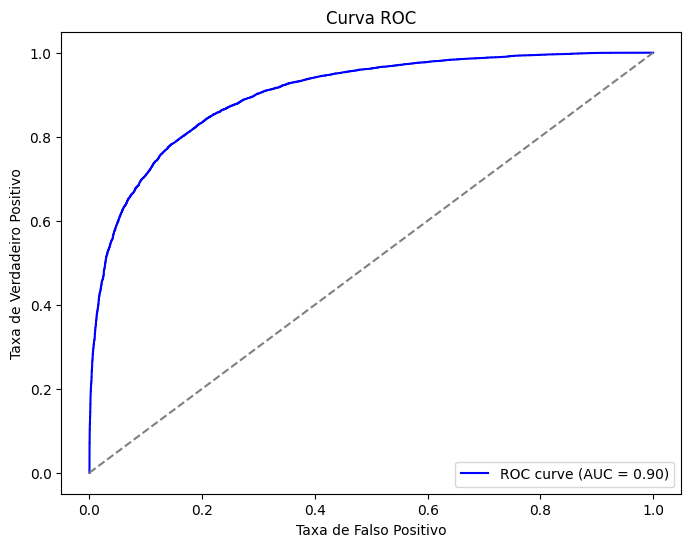

In [27]:
from sklearn.ensemble import RandomForestClassifier
modelo_random_forest_gs = RandomForestClassifier(max_depth=15, n_estimators= 200)
roda_modelo(modelo_random_forest_gs)

## **Testando o modelo** 😊

Após treinar e otimizar o modelo Random Forest usando Grid Search, o próximo passo é testá-lo com novos dados para verificar sua eficácia na classificação de músicas como "agitadas" ou "lentas". Utilizamos um conjunto de dados novo, carregado e preparado especificamente para este teste.



In [ ]:
import numpy as np

novos_dados = pd.read_excel("novos_dados.xlsx")
base_original = pd.read_excel("novos_dados.xlsx")

#Criando a pipeline
coluna = ['track_genre']
label_encoder_dataframe(novos_dados, coluna)
novos_dados = scaler.transform(novos_dados)

# Realize a previsão usando o modelo Random Forest treinado
previsoes = modelo_random_forest_gs.predict(novos_dados)

# Obtendo o predict
def mapear_valor(valores):
    resultados = []
    for valor in valores:
        if valor == 0:
            resultados.append('Música agitada')
        elif valor == 1:
            resultados.append('Música lenta')
        else:
            resultados.append('Desconhecido')
    return np.array(resultados)

base_original['target'] = mapear_valor(previsoes)
base_original.head()

,popularity,duration_ms,danceability,energy,loudness,acousticness,instrumentalness,liveness,track_genre,target
0,80,200000,0.89,0.8,-19333,0.0555,0.976,0.45,rock,Música agitada
1,30,205000,0.20,0.5,-11773,0.0100,0.452,0.20,folk,Música lenta


**Resultados:**

Após a execução do modelo, revisamos as previsões para garantir que o processo está funcionando conforme o esperado. Este teste não só verifica a precisão do modelo, mas também ajuda a identificar áreas onde podemos melhorar o processo de classificação para futuras implementações.